# 上采样

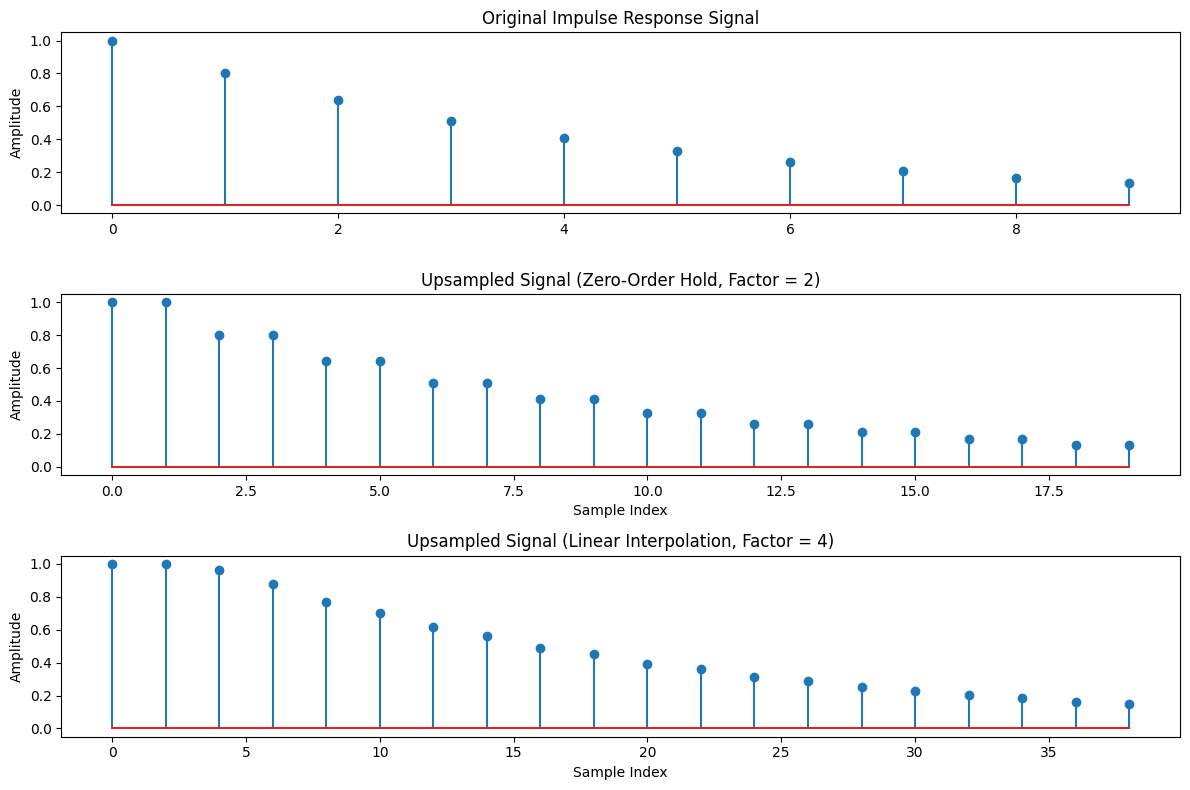

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义上采样函数（零阶保持法）
def upsampling_zero_order_hold(x, factor):
    N = len(x)
    y = np.zeros(N * factor)
    for n in range(N):
        y[n * factor:(n + 1) * factor] = x[n]
    return y

# 定义上采样函数（线性插值法）
def upsampling_linear_interpolation(x, factor):
    N = len(x)
    y = np.zeros(N * factor)
    for n in range(N):
        if n == 0:
            y[0:factor] = x[0]
        else:
            for i in range(factor):
                y[n * factor + i] = x[n - 1] + (i + 1) * (x[n] - x[n - 1]) / (factor + 1)
    return y

original_signal = np.zeros(10)
original_signal[0] = 1.0
for i in range(1, 10):
    original_signal[i] = original_signal[i - 1] * 0.8

# 使用零阶保持法以2为因子进行上采样
upsampled_signal_zero_order = upsampling_zero_order_hold(original_signal, 2)

# 使用线性插值法以4为因子进行上采样
upsampled_signal_linear = upsampling_linear_interpolation(original_signal, 4)

# 可视化原始信号和上采样后的信号
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.stem(original_signal)
plt.title('Original Impulse Response Signal')
plt.ylabel('Amplitude')

# 零阶保持法
plt.subplot(3, 1, 2)
plt.stem(upsampled_signal_zero_order)
plt.title('Upsampled Signal (Zero-Order Hold, Factor = 2)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# 线性插值法
plt.subplot(3, 1, 3)
x_axis = np.arange(len(upsampled_signal_linear))
interpolated_points = []
for i in range(0, len(x_axis), 2):
    interpolated_points.append(upsampled_signal_linear[i])
plt.stem(x_axis[::2], interpolated_points)
plt.title('Upsampled Signal (Linear Interpolation, Factor = 4)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 下采样

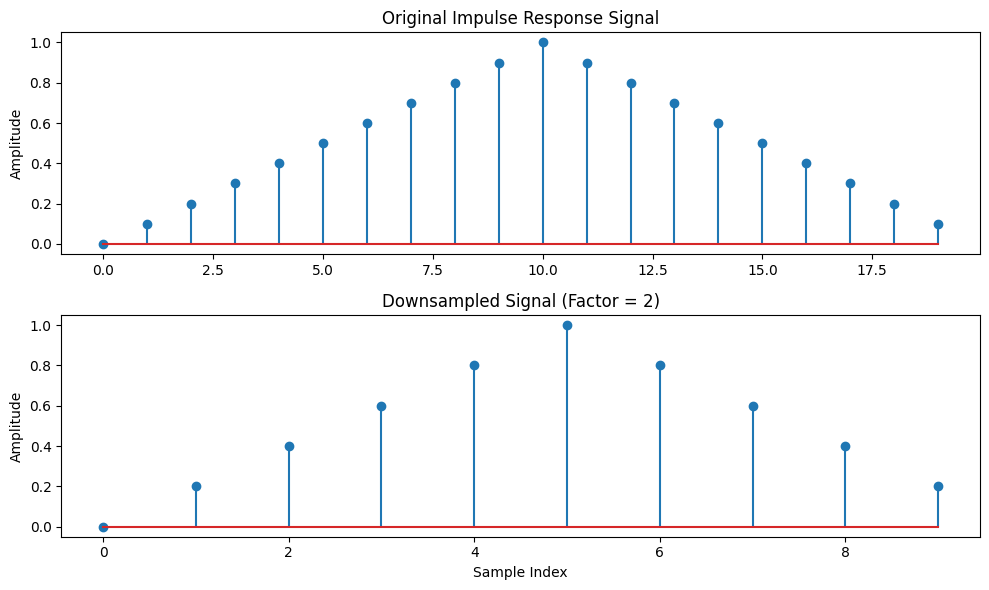

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义下采样函数
def downsampling(x, factor):
    N = len(x)
    y = np.zeros(N // factor)
    for n in range(N // factor):
        y[n] = x[n * factor]
    return y

# 这里生成一个简单的先上升后下降的冲击序列作为示例
original_signal = np.zeros(20)
original_signal[0] = 0
for i in range(1, 10):
    original_signal[i] = i * 0.1
for i in range(10, 20):
    original_signal[i] = (20 - i) * 0.1

# 进行下采样（以2为因子下采样）
downsampled_signal = downsampling(original_signal, 2)

# 原始信号
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.stem(original_signal)
plt.title('Original Impulse Response Signal')
plt.ylabel('Amplitude')

#下采样后的信号
plt.subplot(2, 1, 2)
plt.stem(downsampled_signal)
plt.title('Downsampled Signal (Factor = 2)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()